In [111]:
from math import sqrt

In [112]:
plot1 = [1,3]
plot2 = [2,5]

euclid_dist = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
euclid_dist

2.23606797749979

In [113]:
import numpy as np
import plotly.express as px
from collections import Counter
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import random

In [114]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

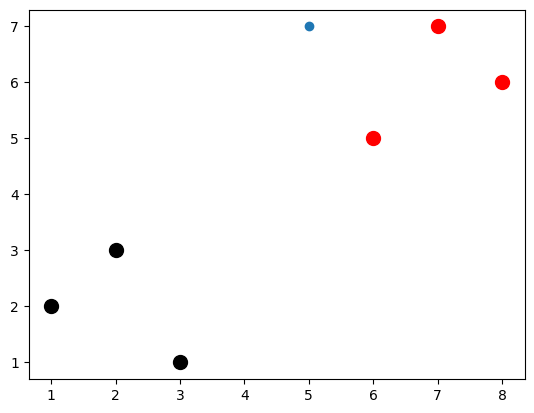

In [115]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])
 
plt.show()

In [116]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total groups')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

In [117]:
result, confidence = k_nearest_neighbors(dataset, new_features, k=3)
result

'r'

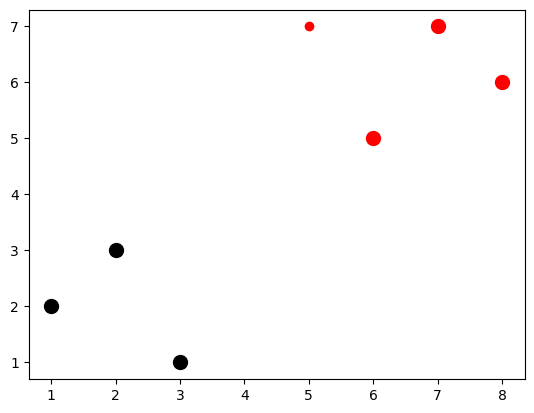

In [118]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result)
 
plt.show()

In [138]:
acc = []

for i in range(30):
    df = pd.read_csv('breast-cancer-wisconsin.data', na_values='?', header=0).fillna(-99999).drop('id', axis=1)
    full_data = df.astype(float).values.tolist()

    random.shuffle(full_data)

    testSize = 0.2
    trainSet = {2:[], 4:[]}
    testSet = {2:[], 4:[]}
    trainData = full_data[:-int(testSize*len(full_data))] 
    testData = full_data[-int(testSize*len(full_data)) :] 

    for i in trainData:
        trainSet[i[-1]].append(i[:-1])
        
    for i in testData:
        testSet[i[-1]].append(i[:-1])
        
    correct = 0
    total = 0

    for group in testSet:
        for data in testSet[group]:
            vote, confidence = k_nearest_neighbors(trainSet, data, k=5)
            if group == vote:
                correct += 1
            # else:
            #     print(confidence)
            total += 1
            
    # print('Accuracy:', correct/total)
    acc.append(correct/total)

# print(acc)
print('Accuracy:', sum(acc)/len(acc))

Accuracy: 0.9688249400479614


3x5: 0.9827338129496404, 0.9625899280575541, 0.9654676258992806

3x10: 0.9733812949640288, 0.9719424460431654, 0.9618705035971222

3x20: 0.9701438848920863, 0.9669064748201439, 0.9748201438848921

3x30: 0.9688249400479615, 0.9666666666666663, 0.9688249400479614